# Overview
Energy usage and pricing for 8 different types of energy are cleaned and analyzed in this project for the United states. Along with this, unemployment data in the U.S. is included for further insight into how usage has changed over the course of 2010-2014.
* Energy usage hasn't appeared to change very substantially over the five year window
* Fossil fuels remains as the primary source of energy
* There is a positive correlation between the unemployment rate an energy usage. 


# Introduction

## Problem
Energy consumption is an ongoing concern for many americans, as the cost of energy and the economy fluctuate, the needs for energy remain present. Energy is consumed almost non stop for many people; they start off their day with their cell phone, lights, and maybe a pot of coffee with breakfast. Following this, they get in their cars to travel to work, use a steady stream of energy for the majority of the day, then return to their cars to travel home, just to sit in front of their electronic devices. Basically the only time of day that energy usage drops is at night. 


Consumers want to be able to afford a constant stream of energy, but society seems to be slowly pushing towards keeping a healthier Earth, and fossil fuels are quickly running out. This leads energy companies needing to figure out what energy sources people are trending to use more of, and how much will be consumed so that they can satisfy the consumers, as well as make a lovely profit. 



## Approach
In this project we study the trends of energy consumption and how it relates to the GDP and unemployment rates of the state. The information used in this project was pulled from Kaggle, however it is all readily available through the US Energy Information Administration. Here they have all quarterly GDP information, consumption amounts, pricing, expenditure, and production for various energy types broken down each year by state. Graphical and statistical EDA are performed to understand trends in the consumption data, multi state comparison of consumption differences, and how this correlates to GDP and unemployment rates. Using bootstrapping we will determine if the reported energy usage per capita holds up with the data for the years of observation.



## Dataset
The consumption data is obtained through Kaggle's dataset at https://www.kaggle.com/lislejoem/us_energy_census_gdp_10-14, the unemployment 
and additional GDP information were also pulled from Kaggle at https://www.kaggle.com/jayrav13/unemployment-by-county-us and https://www.kaggle.com/solorzano/gdp-per-capita-in-us-states respectively. The first, and main, file contains only 1 row for each state, then columns for each energy types consumption, expenditure, price, and production, further broken out by the year; just to name a few. The other two datasets provide two additional fields of observation; unemployment rate, and the GDP per capita. While the first dataset is the primary focus, the other two add insights on rates of consumption


# Data Acquisition and Cleaning
For this project, a few different datasets were used. The first is a CSV file with 52 rows and 192 columns. Each row represents a state, and each column breaks down different economic aspects as well as energy consumption. This data came with a few challenges; the different years weren’t their own rows, as only states were determining factors for rows. The columns also had energy broken down by type, consumption, production, expenditure, and price for each year. 



To be able to use these columns, I first searched for column names contain string versions of the years. I then had lists of columns names for each year, and another group that didn’t contain a year (these are the base columns that are needed like state, region, whether the state borders a coast, state codes, and whether the state border one of the great lakes. Each list of years columns was combined with the list of “other” columns, and that list of column names were selected from the original dataset, and a new “Year” column was tacked on the end. When the year columns were broken out into their own lists, the “year” was dropped from the end of the column names. I then concatenated all of the tables for each year back together, since they all had the same column names, they were just stacked on top of each other. 



Once the data was broken out by year the CENSUSPOP column was dropped, due to the large number of missing values. After that the process that was done for each year needed to be redone, for each energy type this time. Energy columns had the energy type as the start of the energy column, with either C, E, P, or Price at the end of it. So I repeated all the steps from the “Year” process, for the energy types, and created the new column for “Energy_type”, and renamed the “C”, “E”, and “P” columns with “Consumption”, “Expenditure”, and “Production”.



The other datasets that were used were Unemployment and GDP per capita tables. The two CSV files were joined to the first dataset, prior to breaking it out by year and energy type. The first thing I did was drop the year values from the table that weren’t available in the main table, then a few columns that wouldn’t be used. I then consolidated the unemployment data by grouping computing the average unemployment rate for a state, for each year (previously there was a row for each county within a state). Next the data had to be pivoted so that each row represented a state, and there was a different column for each year. Once this was done we had close to the same shape as the main data, so they were left joined by state. There ended up being a few states that were missing from the unemployment data that would be handled later.



The GDP per capita went through roughly the same transformations as the Unemployment table before it was able to be joined to the main dataset. However, this table actually had some extra “states” that were not available in the main table. But, because they were actually regional, and the data was again left joined, with the main dataset on the left, these excess columns were lost. 



Now that all the data was in 1 table, the missing information needed to be cleaned up. For most of the columns, the average of the column sufficed for filling in the missing data, but for a couple, the missing data represented things that should actually be considered 0, so that’s how those columns were filled. But having that many zeros throws off the Price data a little. 



Seven of the columns; State Codes, States, Energy type, Region, Coast, Division and Year were all converted to categories as there were a limited range of values for each of them.


In [5]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 90)
import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload

%autoreload 1

%aimport energy_clean

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Import data
Call the energy_clean python script to clean the data for us and return a final, cleaned up, single dataset.

In [6]:
df_after = energy_clean.clean_data()

GDPQ2 StateCodes    GDPQ3  TotalConsumption  RNATURALINC    RDEATH  \
0   175198         AL   178520           1931522     4.234652  8.367475   
1    53673         AK    54846            653221     4.234652  8.367475   
2   246487         AZ   248985           1383531     4.234652  8.367475   
3   104880         AR   106687           1120632     4.234652  8.367475   
4  1943428         CA  1963650           7760629     4.234652  8.367475   

   TotalPrice  RINTERNATIONALMIG  Great Lakes  TotalExpenditures  POPESTIMATE  \
0       17.82           2.460574          0.0            21630.5      4785822   
1       20.13           2.460574          0.0             6473.9       713856   
2       22.25           2.460574          0.0            19372.7      2922297   
3       16.90           2.460574          0.0            12269.4      6411999   
4       20.97           2.460574          0.0           117090.0     37336011   

   GDP_per_cap   RNETMIG    GDPQ1 Region    GDPQ4  RDOMESTICMIG         GDP  \
0        35913  2.856392   172033    3.0   179132      0.403579   176220.75   
1        69564  2.856392    52307    4.0    56054      0.403579    54220.00   
2        37935  2.856392   242824    4.0   251036      0.403579   247333.00   
3        34671  2.856392   101063    3.0   107085      0.403579   104928.75   
4        51871  2.856392  1920145    4.0  2016517      0.403579  1960935.00   

   Year       State Coast     RBIRTH Division  TotalProduction  Unemp_rate  \
0  2010     Alabama   1.0  12.602127      6.0          1419613   12.360697   
1  2010      Alaska   1.0  12.602127      9.0          1738207    7.834320   
2  2010     Arizona   0.0  12.602127      8.0           580948   13.060000   
3  2010    Arkansas   0.0  12.602127      7.0          1247709    9.101111   
4  2010  California   1.0  12.602127      9.0          2532205   13.893276   

   Consumption Energy_type  Expenditure  Production  Price  
0       169088     Biomass          0.0         0.0    0.0  
1         4178     Biomass          0.0         0.0    0.0  
2        29289     Biomass          0.0         0.0    0.0  
3        94865     Biomass          0.0         0.0    0.0  
4       280124     Biomass          0.0         0.0    0.0

# Data Visualizations
Time to see what kinds of relationships we can find within the data. Before any statistical analysis is done, we will take a look at some graphs of the data and see if there is anything unique about it.

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

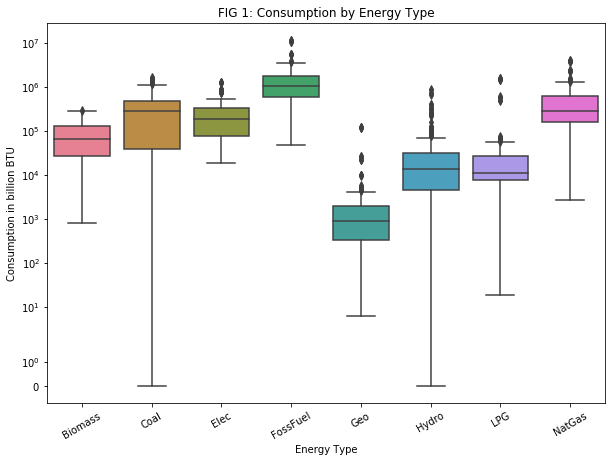

In [26]:
plt.figure(figsize=(10,7))
_ = sns.boxplot(x='Energy_type', y='Consumption', data=df_after, palette='husl')
plt.title("FIG 1: Consumption by Energy Type")
plt.xlabel("Energy Type")
plt.ylabel("Consumption in billion BTU")
_.set_yscale('symlog')
plt.xticks(rotation=30)
plt.show()

The first thing that felt important to look at was the spread of consumption information by each energy type. The boxplot is shown in Figure 1. Wit it we can clearly see that Fossil Fuels are the most used energy type, and Geothermal is the least used.

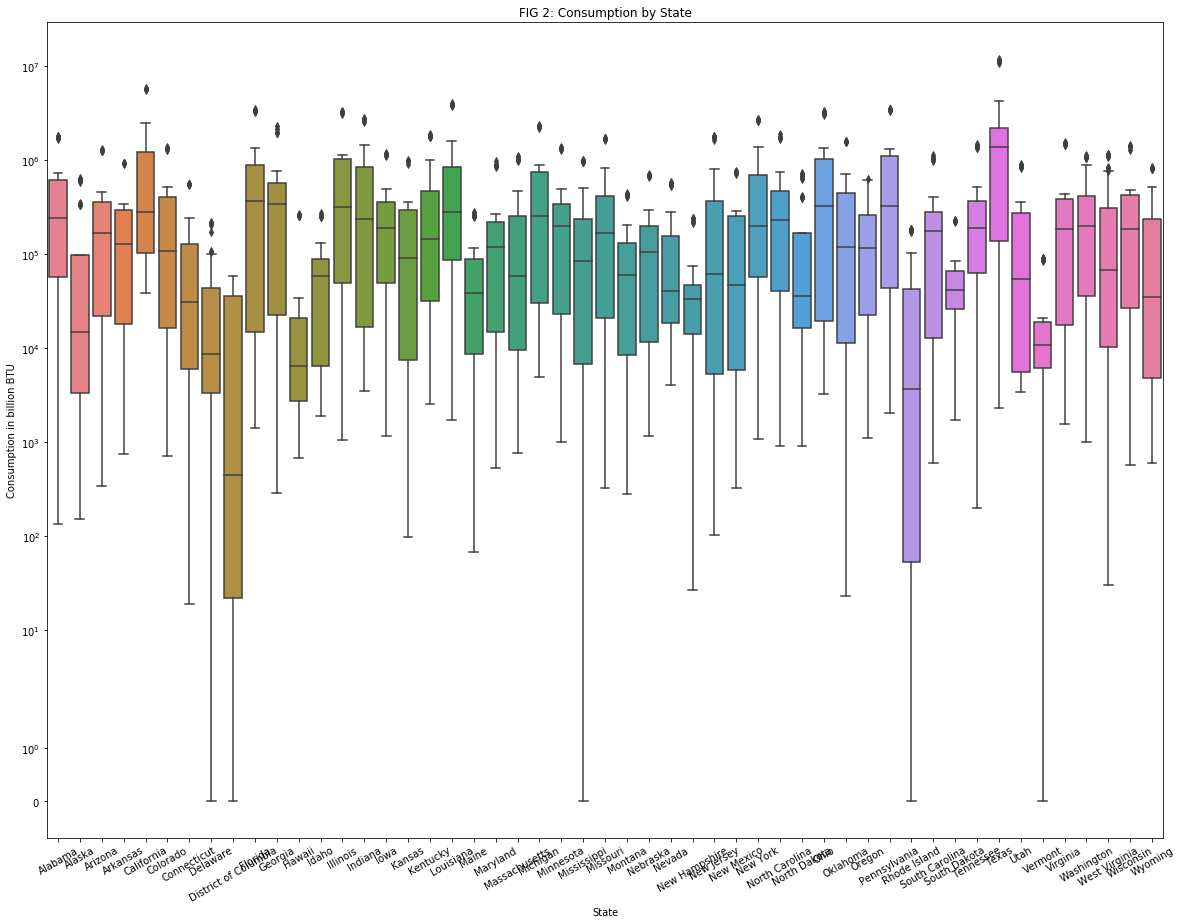

In [27]:
plt.figure(figsize=(20,15))
_ = sns.boxplot(x='State', y='Consumption', data=df_after, palette='husl')
plt.title("FIG 2: Consumption by State")
plt.xlabel("State")
plt.ylabel("Consumption in billion BTU")
_.set_yscale('symlog')
plt.xticks(rotation=30)
plt.show()

Plotting out the energy consumption by each state, regardless of the energy source was interesting to see. While it’s a lot of data, we can easily see the high point was for Texas. They have the largest outlier, as well as highest average energy consumption. On the other extreme, Delaware has the lowest average and one of the biggest spreads of data. 

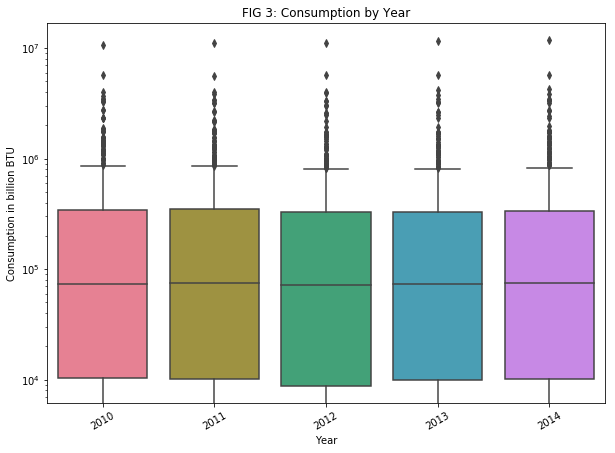

In [28]:
plt.figure(figsize=(10,7))
_ = sns.boxplot(x='Year', y='Consumption', data=df_after, palette='husl')
plt.title("FIG 3: Consumption by Year")
plt.xlabel("Year")
plt.ylabel("Consumption in billion BTU")
_.set_yscale('log')
plt.xticks(rotation=30)
plt.show()


The yearly data shows there isn’t much of a change in the consumption amounts between the years; there seems to only be a very slight upward trend for energy consumption by year, with minimally larger outliers. But, because it’s so minimal, it could just be a trick of the eye from the large scale of the data. It is a little disappointing that it doesn’t show as wide a range of variability as the other categorical variables. However, both 'State' and 'Energy_type' show a lot of variability. 

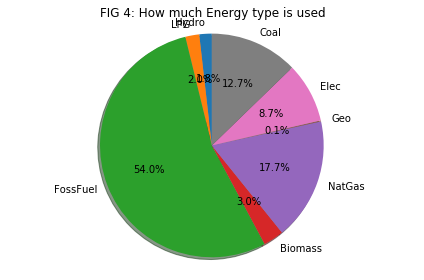

In [29]:
# Pie chart

labels = list(set(df_after.Energy_type))
sizes = []
tot_con = df_after.Consumption.sum()
for label in labels:
    sizes.append((df_after[df_after.Energy_type == label].Consumption.sum()) / tot_con)
    
# only "explode" the smallest (Geo) slice
explode = (0, 0, 0, 0, 0, 0, 0, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
plt.title('FIG 4: How much Energy type is used')
plt.tight_layout()
plt.show()

While we've already seen that fossil fuels are the most widely used energy types in Figure 1, the Pie Chart in Figure 4 shows that it actually accounts for 54% of the total energy usage for all the years in the dataset, Geothermal accounting for only 0.1% of it, and Electric for only 8.7%. The large amount of fossil fuel usage makes sense with the number of cars on the road and the amount of driving done every day in the United States. While it isn’t shown in the years of data the transition to electric cars may help to change the percentage to be more electric usage, and less fossil fuel each year. 

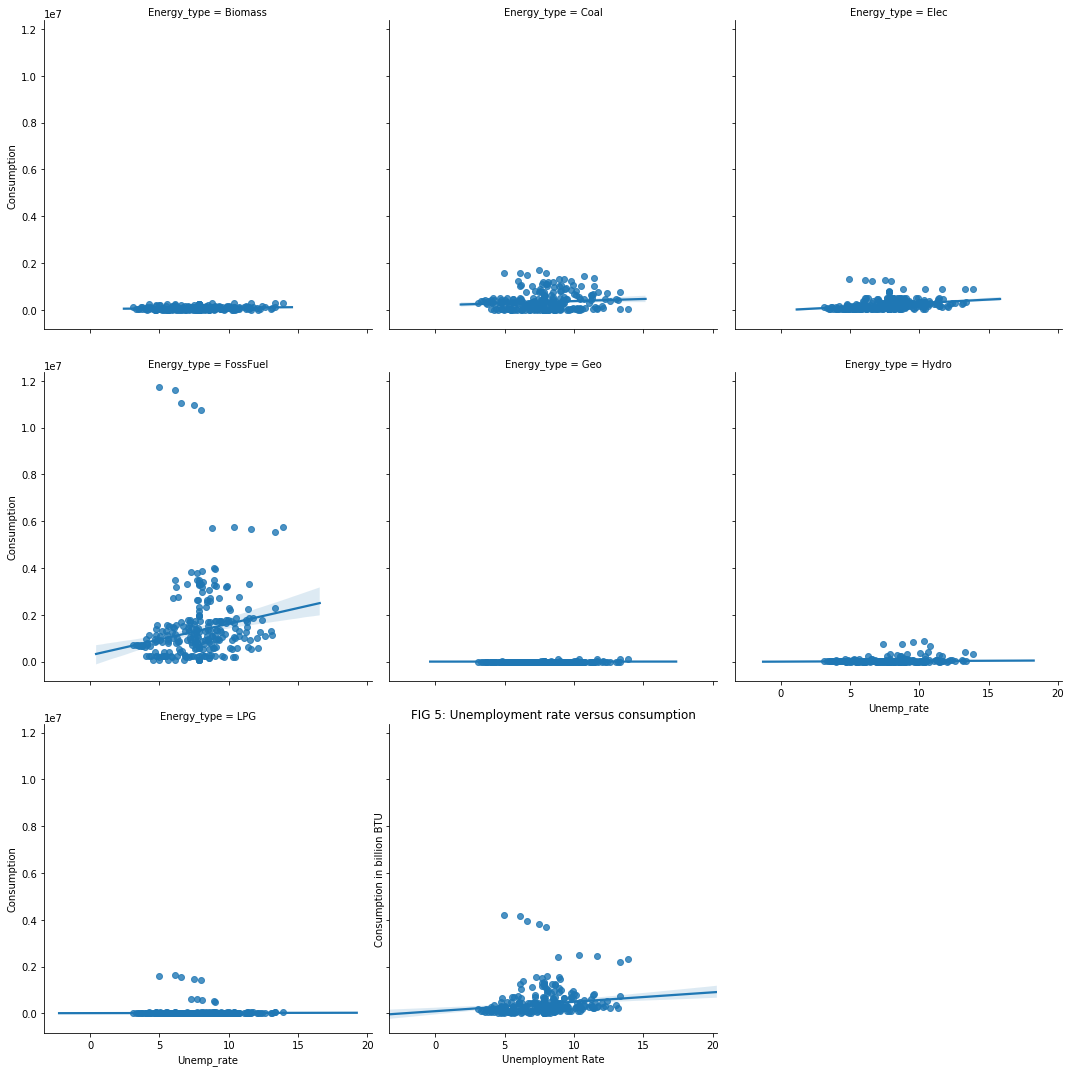

In [30]:
g = sns.lmplot(x="Unemp_rate", y="Consumption", col="Energy_type", col_wrap=3, data=df_after, robust=True)
plt.title("FIG 5: Unemployment rate versus consumption")
plt.xlabel("Unemployment Rate")
plt.ylabel("Consumption in billion BTU")
plt.show()

These 7 charts show the influence of the  unemployment rate against the Energy consumption. Most of the graphs don’t show much of a correlation, probably due to the small amount of consumption for those types. However, the Fossil Fuel, Electric, and Natural Gas show that the higher the unemployment rate, the more energy is consumed. This is because the more people are at home instead of at work, the more they’re using electricity, whether that be through home computers, televisions, or air conditioning, while the businesses would use close to the same amount of energy no matter the employees, because they still keep the temperature roughly the same, and the electrical equipment in an office or building would still be running approximately the same. 

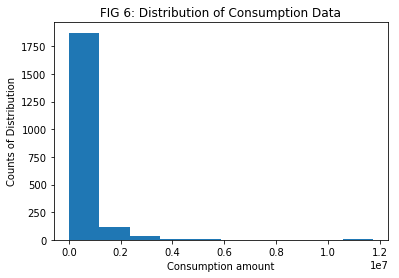

In [31]:
plt.hist(x=df_after.Consumption)
plt.title("FIG 6: Distribution of Consumption Data")
plt.xlabel("Consumption amount")
plt.ylabel("Counts of Distribution")
plt.show()

The total distribution of consumption data is displayed in Figures 6 and 7. Figure 6 has all data points while Figure 7 (below) has had the highest 10 values dropped prior to the graph being plotted. In this, we can see that the data is exponentially distributed. The consumption amount is in billions of BTU. Since we had broken the energy down to be by energy type, and year, it makes sense that some years, close to 0 billions of BTU were used for say, geothermal energy. The consumption data is the most interesting portion, because it’s what energy companies will be looking at. The next thing to be looked at is the energy consumption per capita.

In [32]:
#Dropping top 10 highest  values that are causing graph to better view the majority of the data
df_after.sort_values('Consumption', inplace=True, ascending=False)
print(df_after.Consumption.describe())
df_after_missing_high = df_after[df_after.Consumption < 2000000]

count    2.040000e+03
mean     3.611719e+05
std      8.447528e+05
min      0.000000e+00
25%      9.696250e+03
50%      7.292000e+04
75%      3.390858e+05
max      1.175266e+07
Name: Consumption, dtype: float64


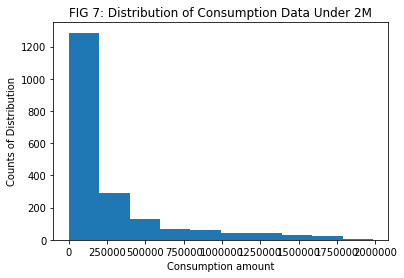

In [33]:
plt.hist(x=df_after_missing_high.Consumption)
plt.title("FIG 7: Distribution of Consumption Data Under 2M")
plt.xlabel("Consumption amount")
plt.ylabel("Counts of Distribution")
plt.show()

Even with dropping the high values, it is clear that our consumptiondata is exponentially distributed. 

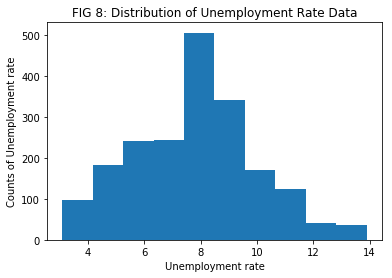

In [34]:
plt.hist(x=df_after_missing_high.Unemp_rate)
plt.title("FIG 8: Distribution of Unemployment Rate Data")
plt.xlabel("Unemployment rate")
plt.ylabel("Counts of Unemployment rate")
plt.show()

In [7]:
Our unemployment rates actually look pretty normally distributed. 

SyntaxError: invalid syntax (<ipython-input-7-803abb1a4f6e>, line 1)

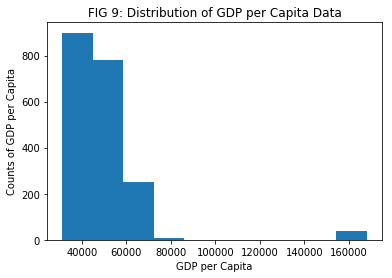

In [35]:
plt.hist(x=df_after_missing_high.GDP_per_cap)
plt.title("FIG 9: Distribution of GDP per Capita Data")
plt.xlabel("GDP per Capita")
plt.ylabel("Counts of GDP per Capita")
plt.show()

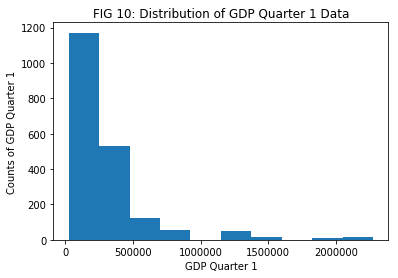

In [36]:
plt.hist(x=df_after_missing_high.GDPQ1)
plt.title("FIG 10: Distribution of GDP Quarter 1 Data")
plt.xlabel("GDP Quarter 1")
plt.ylabel("Counts of GDP Quarter 1")
plt.show()

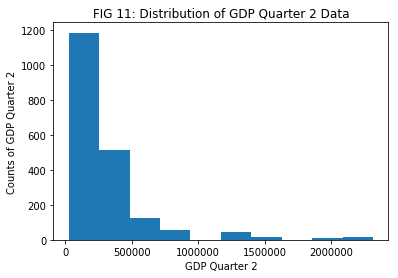

In [37]:
plt.hist(x=df_after_missing_high.GDPQ2)
plt.title("FIG 11: Distribution of GDP Quarter 2 Data")
plt.xlabel("GDP Quarter 2")
plt.ylabel("Counts of GDP Quarter 2")
plt.show()

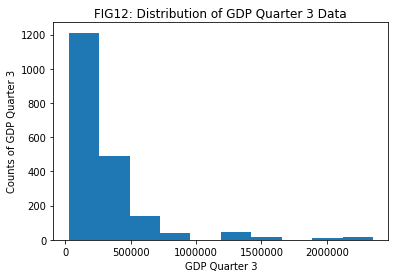

In [38]:
plt.hist(x=df_after_missing_high.GDPQ3)
plt.title("FIG12: Distribution of GDP Quarter 3 Data")
plt.xlabel("GDP Quarter 3")
plt.ylabel("Counts of GDP Quarter 3")
plt.show()

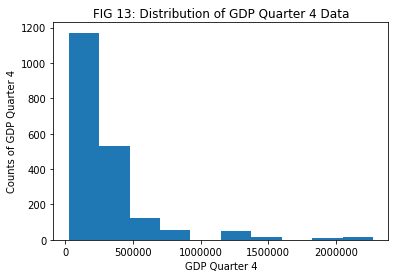

In [39]:
plt.hist(x=df_after_missing_high.GDPQ1)
plt.title("FIG 13: Distribution of GDP Quarter 4 Data")
plt.xlabel("GDP Quarter 4")
plt.ylabel("Counts of GDP Quarter 4")
plt.show()

Above are the 4 GDP quarters histogrammed to see what GDP values were most prevalent. While the unempolyment rate data appears to be normally distributed, but all four GDP Quarter data columns appear to be exponentially distributed like the energy consumption. The Quarter 1 GDP data looks to have the lowest max value.

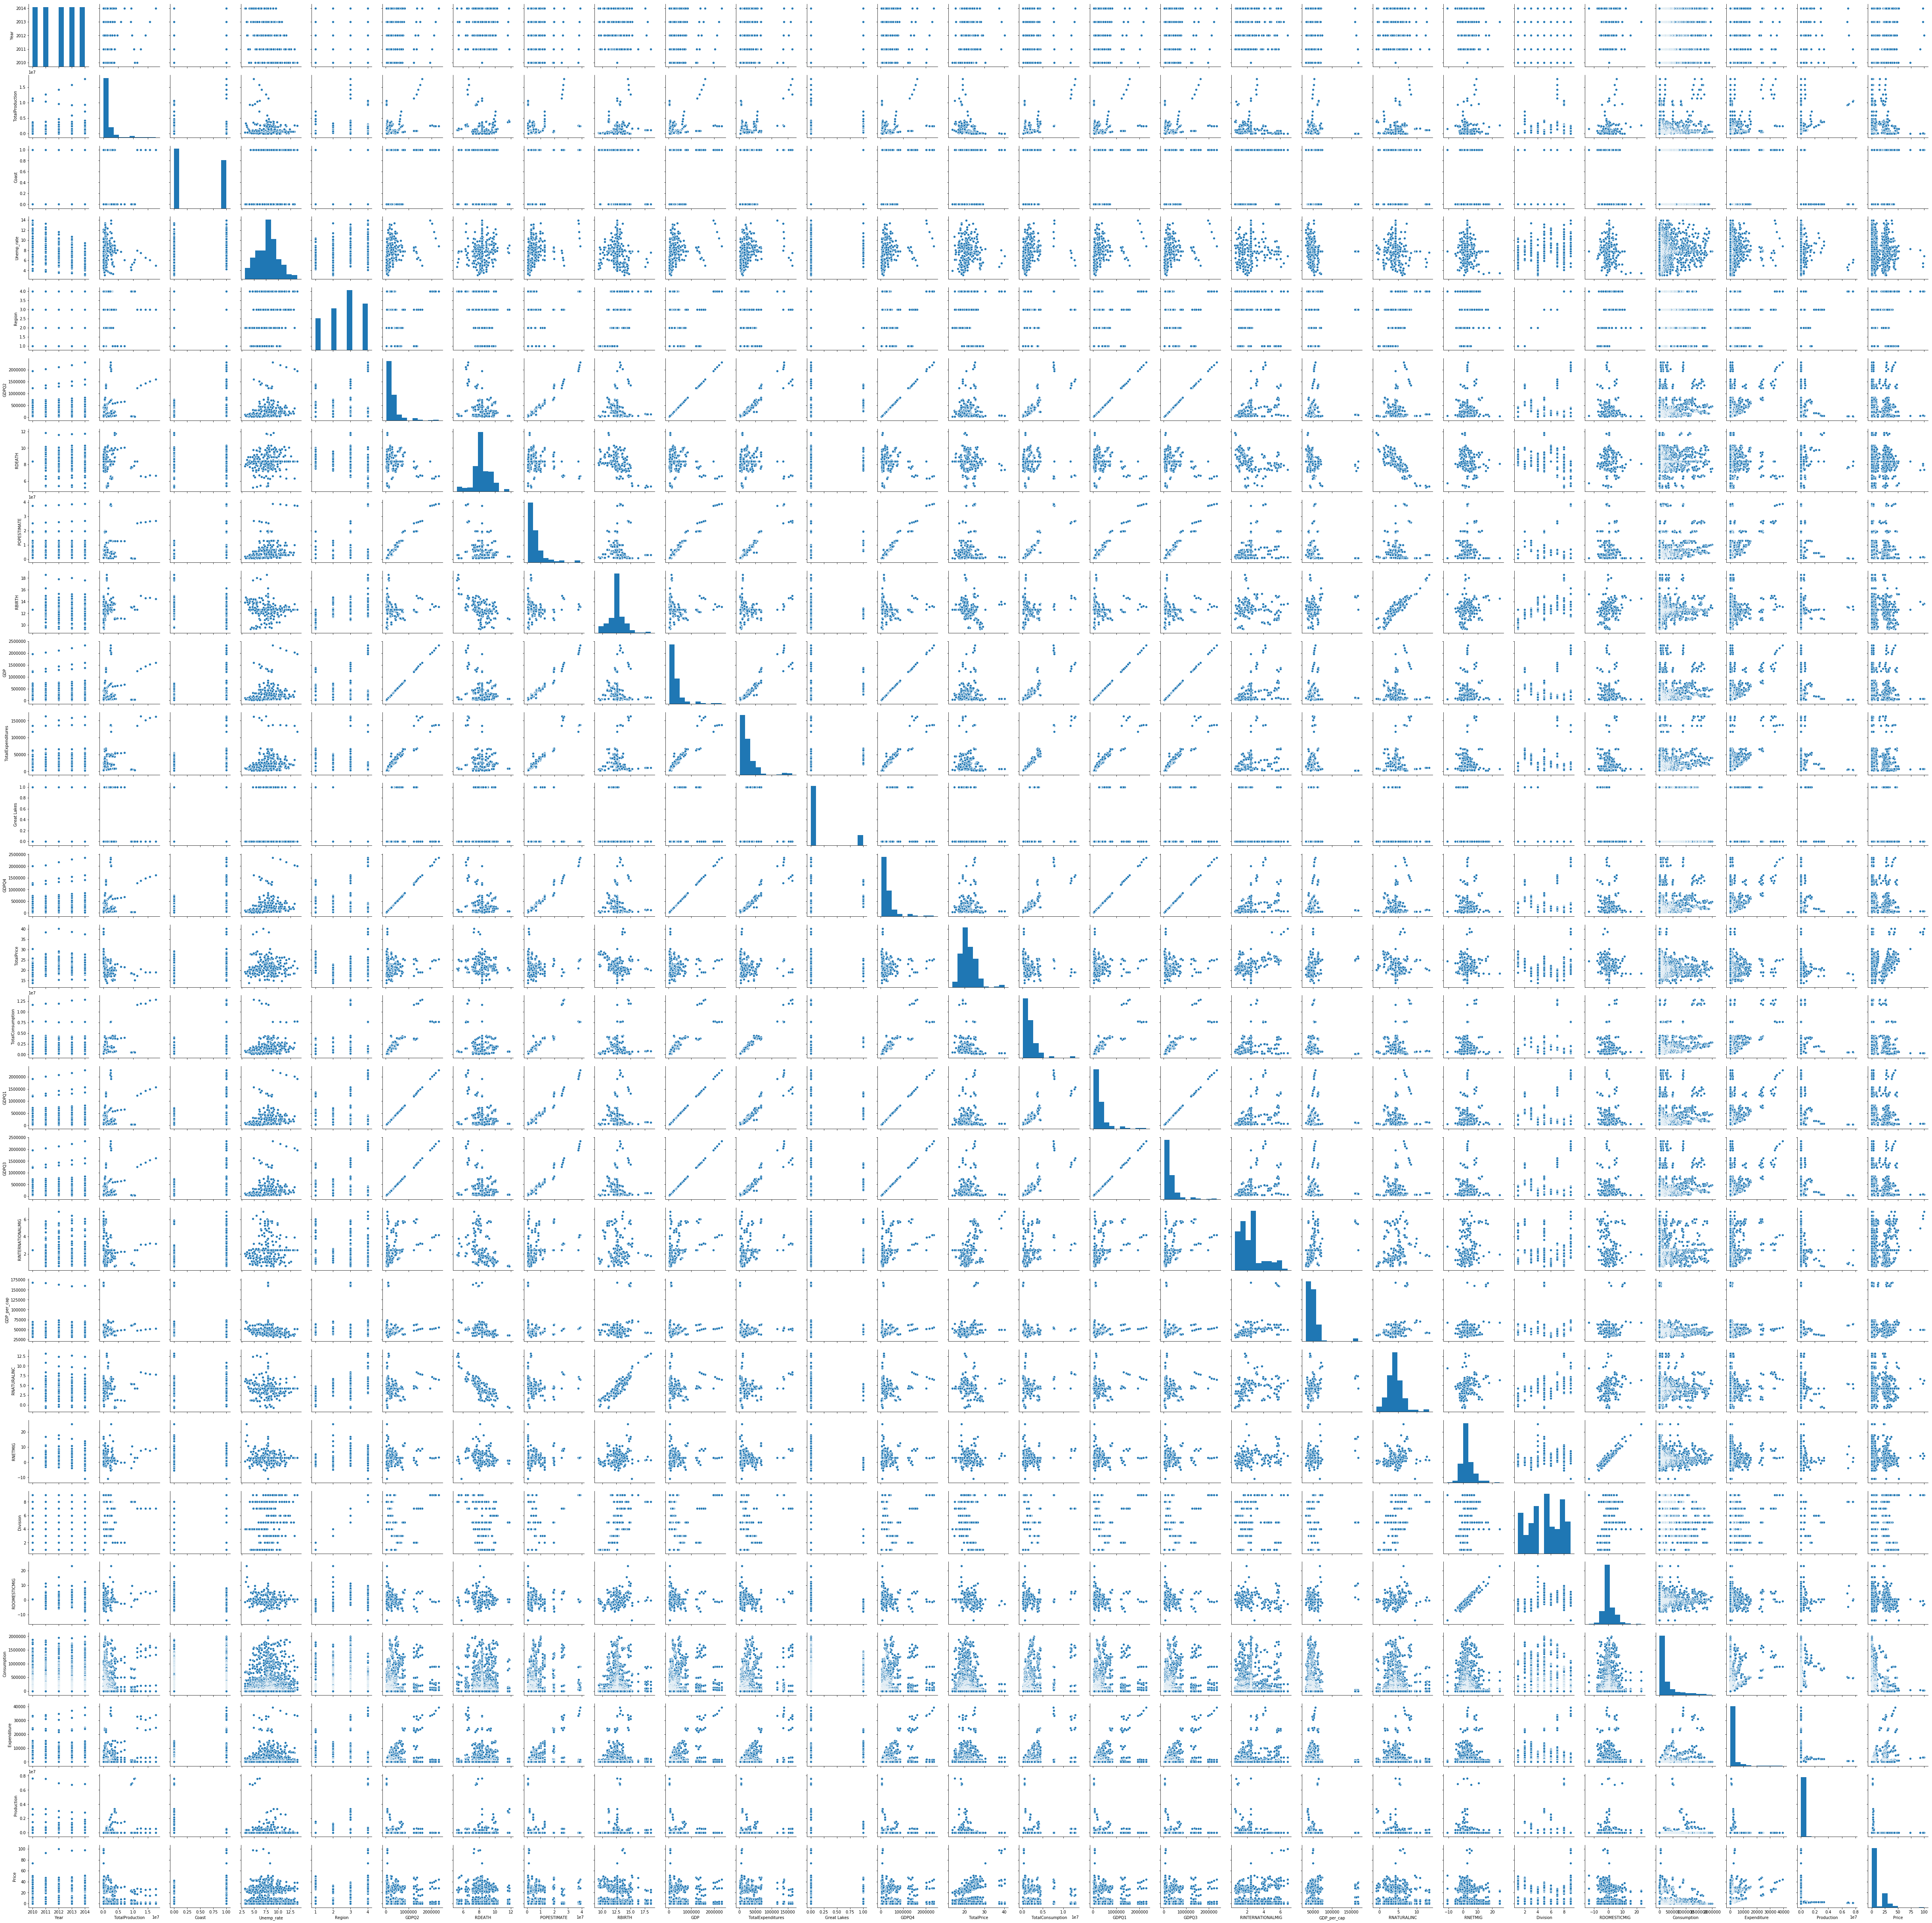

In [40]:
sns.pairplot(data=df_after_missing_high, palette='husl')
plt.show()

Because there are so many numerical values, the pairplot contains a lot of information. Just glancing at it it appears that most variables have a positive correlation, or no real correlation. This will be useful when trying to build a predictive model.

In [42]:
df_after_missing_high.columns
len(df_after_missing_high[df_after_missing_high['Consumption']==0])

25

In [43]:
df_after_missing_high['Consumption_per_capita'] = df_after_missing_high.apply(lambda x: (x['Consumption']/x['POPESTIMATE'])*1000, axis=1)
df_after_missing_high.Consumption_per_capita.describe()
df_amh_by_state = df_after.groupby(['Year','State'])[['Consumption', 'POPESTIMATE']].max().reset_index()
df_amh_by_state['Consumption_per_capita'] = df_amh_by_state.apply(lambda x: (x['Consumption']/x['POPESTIMATE'])*1000, axis=1)
df_amh_by_state.head()

Year       State  Consumption  POPESTIMATE  Consumption_per_capita
0  2010     Alabama      1785688      4785822              373.120438
1  2010      Alaska       634777       713856              889.222756
2  2010     Arizona      1292346      2922297              442.236364
3  2010    Arkansas       909827      6411999              141.894439
4  2010  California      5741492     37336011              153.778935

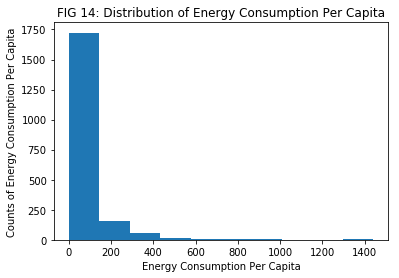

In [44]:
plt.hist(x=df_after_missing_high.Consumption_per_capita)
plt.title("FIG 14: Distribution of Energy Consumption Per Capita")
plt.xlabel("Energy Consumption Per Capita")
plt.ylabel("Counts of Energy Consumption Per Capita")
plt.show()

To format this data, we needed to create a new column that encompassed the Consumption data divided by the population estimate. Because the Consumption data was in Billions of BTU, to get it into millions, we simply needed to multiple by 1000. Now we’re in a readable scale. This information is still exponentially distributed, so we won’t be able to use some statistical analysis methods to approach it. 

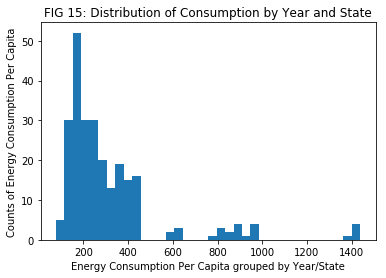

In [45]:
n_bins = int(np.sqrt(max(df_amh_by_state.Consumption_per_capita) - min(df_amh_by_state.Consumption_per_capita)))
plt.hist(x=df_amh_by_state.Consumption_per_capita, bins=n_bins)
plt.title("FIG 15: Distribution of Consumption by Year and State")
plt.xlabel("Energy Consumption Per Capita grouped by Year/State")
plt.ylabel("Counts of Energy Consumption Per Capita")
plt.show()

In [46]:
df_amh_by_state.describe()

Consumption   POPESTIMATE  Consumption_per_capita
count  2.550000e+02  2.550000e+02              255.000000
mean   1.560458e+06  6.158962e+06              314.329361
std    1.773931e+06  6.927430e+06              239.252622
min    4.902500e+04  5.643580e+05               77.199861
25%    5.945490e+05  1.623654e+06              170.943048
50%    1.092732e+06  4.383465e+06              239.251491
75%    1.757707e+06  6.783760e+06              365.190284
max    1.175266e+07  3.880250e+07             1439.728886

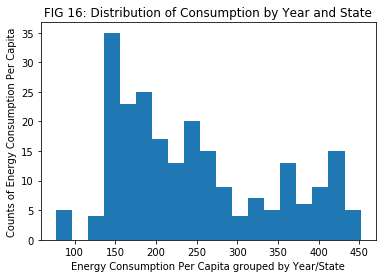

In [47]:
df_a_by_state_mh = df_amh_by_state[df_amh_by_state.Consumption_per_capita < 500]
n_bins = int(np.sqrt(max(df_a_by_state_mh.Consumption_per_capita) - min(df_a_by_state_mh.Consumption_per_capita)))
plt.hist(x=df_a_by_state_mh.Consumption_per_capita, bins=n_bins)
plt.title("FIG 16: Distribution of Consumption by Year and State")
plt.xlabel("Energy Consumption Per Capita grouped by Year/State")
plt.ylabel("Counts of Energy Consumption Per Capita")
plt.show()

It almost looks like our Consumption data by year and state has two peaks. 


In [48]:
df_a_by_state_mh.describe()

Consumption   POPESTIMATE  Consumption_per_capita
count  2.300000e+02  2.300000e+02              230.000000
mean   1.575008e+06  6.644427e+06              246.825960
std    1.821605e+06  7.110536e+06               95.273612
min    4.902500e+04  6.052100e+05               77.199861
25%    5.684692e+05  2.084838e+06              168.506956
50%    1.120216e+06  4.793758e+06              226.179929
75%    1.769896e+06  8.172614e+06              317.075360
max    1.175266e+07  3.880250e+07              451.486258

# Statistical Thinking
Reading through the U.S. Energy Information Administration (E.I.A.) I found that they reported the average consumption per capita, of the primary energy source, in 2016 as 302 million BTU. The average BTU usage per capita from this dataset was calculated as 314 million BTU per capita. There is a slight discrepancy between the two, so by pulling some bootstrap samples, we’ll be able to test how accurate our dataset is. 
Because the E.I.A. only looks at the primary energy source, we grouped the data down to find out which energy source had a max value for each state and year, then kept that row’s data. This is what’s plotted out in Figure 14.

The majority of our data falls below 500 million BTU per capita, with an average of 314.33 million BTU. If we drop values above 500 million BTU per capita, the average drops to 246.83 million BTU per capita. We will hypothesize that the true average Consumption per Capita is 302 million BTU.


    We will hypothesize that the true average Consumption per Capita is 302 million BTU.
    H0: mean(Consumption per Capita) = 302 million BTU
    H1: mean(Consumption per Capita) ≠ 302 million BTU

In [49]:
# Function that will be used in computing the ECDF 
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x: sort the data
    x = np.sort(data)

    # y: range for y-axis
    y = np.arange(1, n+1) / n

    return x, y
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

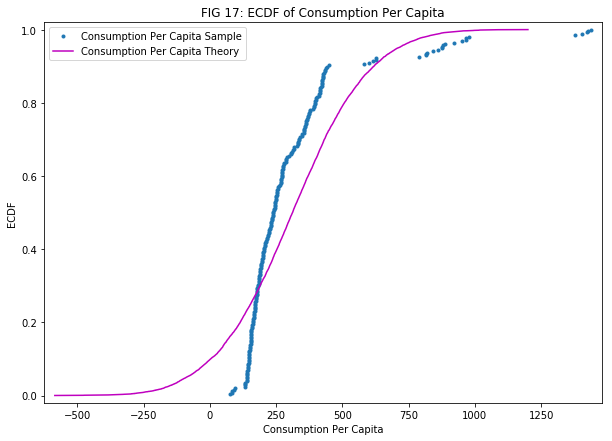

In [50]:
cpc_mean = np.mean(df_amh_by_state.Consumption_per_capita)
cpc_std = np.std(df_amh_by_state.Consumption_per_capita)

cpc_theory = np.random.normal(cpc_mean, cpc_std, 10000)

cpc_x, cpc_y = ecdf(df_amh_by_state.Consumption_per_capita)
cpc_theory_x, cpc_theory_y = ecdf(cpc_theory)

plt.figure(figsize=(10,7))
_ = plt.plot(cpc_x, cpc_y, marker='.', linestyle='none')
_ = plt.plot(cpc_theory_x, cpc_theory_y, color='m')

_ = plt.xlabel('Consumption Per Capita')
_ = plt.ylabel('ECDF')
_ = plt.title('FIG 17: ECDF of Consumption Per Capita')
_ = plt.legend(('Consumption Per Capita Sample',  'Consumption Per Capita Theory'))
plt.margins(0.02)
plt.show()

The consumption per capita is clearly not normally distributed.

To determine where the true mean of our data lies. We'll be drawing bootstrap samples to see if our mean found from our data is true and the mean listed on E.I.A is wrong, or if the deviation from the mean is within reason. 

We'll use bootstrap samples to determine this with a p-value of 0.05.


In [51]:
# We need to translate our Consumption per Capita mean to that of our hypothesis; 302
# We then need to take samples of this translated set to find the percent of the time we would observe our sample's mean
# if the true mean is 302 million BTU
cpc_translated = df_amh_by_state.Consumption_per_capita - cpc_mean + 302
bs_samples = draw_bs_reps(cpc_translated, np.mean, 10000)
p = np.sum(bs_samples >= cpc_mean) / 10000
print('p = ', p)
print(cpc_mean)
print(np.mean(bs_samples))

p =  0.2085
314.3293614776307
302.0601926121738


In [52]:
cpc_var = np.var(df_amh_by_state.Consumption_per_capita)

print('CPC variance: ', cpc_var)

CPC variance:  57017.339310731455


After translating our data to have a mean of 302, like that of our hypothesis, we obtained a P value of 0.2051 for obtaining a mean that is at least as big as our original datasets mean of 314. Which means we cannot reject our null hypothesis of having a mean of 302. There is approximately a 20% chance that we would obtain a sample average of that of our original dataset. 

This means that even if the true average consumption per capita is 302 million BTU, 20% of the time a sample would show a mean at least as extreme as our sample, of 314 million BTU.

Using the full data, bootstrap samples are drawn to see if our mean found from our data is true and the mean listed on E.I.A is wrong, or if the deviation from the mean is within reason. We'll use bootstrap samples to determine this with a p-value of 0.05, following the assumption that the mean is actually 302 million BTU and our dataset is a little off. 

The first step of doing this is scaling our data to have a mean of 302, instead of 314. We do this by subtracting the mean from each row of Consumption per Capita, and then adding 302 back to the column. After this is done, we draw 10,000 samples and keep a count of how many of these sample resulted in a mean of 314 or larger. It turns out that we end up with a sample mean of at least 314 nearly 20% of the time (our p-value for this test was 0.2085), making it reasonable to accept our null hypothesis that the true mean consumption per capita is 302 million BTU. 


# Machine Learning

The most interesting part of of this data is to attempt to predict how much energy will be consumed. There are five years of data being analyzed in this project, so for out predictions we'll use the first four years to make predictions for the fifth year. We'll start by doing some standard regression modeling; linear regression, lasso, and ridge, followed by a couple more complex models with Random Forest and K Neighbors. Because we have so many columns (predictors) in our data, we should do pretty well with our predictions. 

The first three, simpler, models will be used just to get a feel for how well we can predict the data. We'll start with default hyperparameters, then later tune them to see if we can obtain better results. 

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 90)
from sklearn.preprocessing import StandardScaler , PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
import sklearn.utils
import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload

%autoreload 1

%aimport energy_clean

In [2]:
def multi_scores(model, train_pred, test_pred):
    r2_train = r2_score(y_train, train_pred)
    r2_test = r2_score(y_test, test_pred)
    mse_train = mean_squared_error(y_train, train_pred)
    mse_test = mean_squared_error(y_test, test_pred)
    score_table.loc[model,:] = r2_train, r2_test, mse_train, mse_test

In [3]:
index = ['LinearRegression','Lasso','Ridge','RandomForestRegressor','KNeighborsRegressor']
score_table = pd.DataFrame(index = index, columns= ['r2_train','r2_test','mse_train','mse_test'])

In [4]:
df_clean = energy_clean.clean_data()

In [5]:
df_clean['Year'].unique()

array([2010, 2011, 2012, 2013, 2014], dtype=int64)

In [6]:
# Turn Categorical fields to dummy numerical variables
state = pd.get_dummies(df_clean['State'], drop_first=True, )
division = pd.get_dummies(df_clean['Division'], drop_first=True)
energy_type = pd.get_dummies(df_clean['Energy_type'], drop_first=True)

# Merge in the dummy table rows
ml_df = pd.concat([df_clean, state, division, energy_type], axis = 1)


# Drop original catetgorical fields
ml_df.drop(['State','StateCodes', 'Division', 'Energy_type', 'TotalConsumption'], axis=1, inplace=True)

In [7]:
# Separate out training and test sets. Consumption will be our goal for predictions.
# We'll be using the last year in our dataset as our test set
train = ml_df[ml_df['Year'] != 2014]
test = ml_df[ml_df['Year'] == 2014]

# Split into predictors and column to predict
X_train = train.drop(['Consumption'], axis=1)
y_train = train['Consumption']
X_test = test.drop(['Consumption'], axis=1)
y_test = test['Consumption']


In [8]:
#Linear Regression
linreg = Pipeline(steps = [('scaler', StandardScaler()), ('linreg', LinearRegression())])
linreg.fit(X_train, y_train)
train_pred = linreg.predict(X_train)
test_pred = linreg.predict(X_test)
features = pd.DataFrame({'Feature':X_train.columns, 'Coefficient':linreg.named_steps.linreg.coef_})

multi_scores('LinearRegression', train_pred, test_pred)
features.sort_values('Coefficient', ascending=False)

Feature   Coefficient
11                 GDPQ4  1.884320e+16
0                  GDPQ3  1.852731e+16
15                 GDPQ2  1.833025e+16
19                 GDPQ1  1.811979e+16
4            RNATURALINC  1.089968e+12
9                 RDEATH  5.510919e+11
13          RDOMESTICMIG  4.012975e+06
6      RINTERNATIONALMIG  1.496892e+06
84              FossFuel  4.867239e+05
66                 Texas  2.128306e+05
88                NatGas  1.400615e+05
32               Florida  8.920738e+04
27            California  8.287475e+04
1            Great Lakes  8.242000e+04
82                  Coal  8.030220e+04
74                     2  7.389825e+04
20                Region  7.226100e+04
8        TotalProduction  6.944225e+04
41             Louisiana  6.483312e+04
7            POPESTIMATE  6.412688e+04
33               Georgia  6.152409e+04
83                  Elec  5.494275e+04
56        North Carolina  5.306391e+04
22            Production  4.743189e+04
69              Virginia  4.327762e+04
3      TotalExpenditures  3.796688e+04
43              Maryland  3.355588e+04
63        South Carolina  3.337156e+04
31  District of Columbia  2.737669e+04
30              Delaware  2.126616e+04
..                   ...           ...
65             Tennessee -2.854069e+04
29           Connecticut -2.942750e+04
18           GDP_per_cap -3.334988e+04
64          South Dakota -3.424297e+04
46             Minnesota -3.811362e+04
52         New Hampshire -4.040069e+04
62          Rhode Island -4.104594e+04
78                     6 -4.153856e+04
42                 Maine -4.211838e+04
53            New Jersey -5.282672e+04
25               Arizona -5.592362e+04
14                 Coast -5.908275e+04
55              New York -5.914500e+04
68               Vermont -6.156469e+04
61          Pennsylvania -6.651850e+04
28              Colorado -6.671338e+04
67                  Utah -7.383281e+04
51                Nevada -7.484694e+04
79                     7 -7.977384e+04
54            New Mexico -7.978762e+04
76                     4 -8.015200e+04
49               Montana -8.375516e+04
35                 Idaho -8.584981e+04
75                     3 -8.951362e+04
81                     9 -1.121473e+05
73               Wyoming -1.146088e+05
77                     5 -2.128569e+05
17               RNETMIG -4.159788e+06
12                RBIRTH -7.012998e+11
16                   GDP -7.381759e+16

[89 rows x 2 columns]

In [9]:
#LASSO 

lasso = Pipeline([('scaler', StandardScaler()), ('lasso', Lasso())])

parms = {'lasso__alpha': np.arange(0, 0.5, 0.05)}
lasso_cv = GridSearchCV(lasso, parms, scoring = 'r2')
lasso_cv.fit(X_train, y_train)

best_parm = lasso_cv.best_params_
print(best_parm, lasso_cv.best_score_)

lasso = Pipeline([('scaler', StandardScaler()), ('lasso', Lasso(alpha = best_parm['lasso__alpha']))])
lasso.fit(X_train, y_train)
train_pred = lasso.predict(X_train)
test_pred = lasso.predict(X_test)

features = pd.DataFrame({'Feature':X_train.columns, 'Coefficient':lasso.named_steps.lasso.coef_})

multi_scores('Lasso', train_pred, test_pred)
features.sort_values('Coefficient', ascending=False)

{'lasso__alpha': 0.45} -53.74392776107868


Feature    Coefficient
84           FossFuel  486721.076459
66              Texas  198692.654287
0               GDPQ3  177460.063273
88             NatGas  139979.903864
82               Coal   80265.530202
7         POPESTIMATE   69910.620604
83               Elec   54668.840291
41          Louisiana   54539.210795
8     TotalProduction   50447.685618
1         Great Lakes   49295.259739
22         Production   47436.778731
27         California   40579.557542
14              Coast   33184.807088
32            Florida   31986.017242
58               Ohio   28146.901762
3   TotalExpenditures   27801.124412
61       Pennsylvania   25471.820205
37            Indiana   23834.561927
36           Illinois   22039.654840
4         RNATURALINC   17933.620580
48           Missouri   16571.843463
78                  6   15779.730206
20             Region   13876.762870
23              Price   12478.378677
16                GDP   11105.565372
33            Georgia    9530.531267
38               Iowa    7144.264804
45           Michigan    6777.921491
9              RDEATH    6326.272090
59           Oklahoma    5720.028090
..                ...            ...
2          TotalPrice  -11597.574574
72          Wisconsin  -11696.868958
67               Utah  -12955.931088
46          Minnesota  -13223.604602
26           Arkansas  -13332.947341
63     South Carolina  -14401.616901
51             Nevada  -15332.665923
87                LPG  -15864.755854
54         New Mexico  -16342.339274
21        Expenditure  -16425.870275
43           Maryland  -17383.844773
29        Connecticut  -17739.724231
64       South Dakota  -17927.692975
68            Vermont  -18992.507374
19              GDPQ1  -19808.461480
49            Montana  -21215.141366
24             Alaska  -21355.981806
60             Oregon  -21454.085866
47        Mississippi  -23756.371735
52      New Hampshire  -24368.234064
35              Idaho  -24927.158994
18        GDP_per_cap  -25204.340777
62       Rhode Island  -25879.952859
30           Delaware  -25986.531634
85                Geo  -26590.538070
42              Maine  -27147.791292
34             Hawaii  -27809.510806
73            Wyoming  -44323.436050
15              GDPQ2  -55151.412147
11              GDPQ4  -89253.663727

[89 rows x 2 columns]

In [10]:
#Ridge
ridge = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())])

parms = {'ridge__alpha': np.arange(0.05, 5, 0.05)}
ridge_cv = GridSearchCV(ridge, parms, scoring = 'r2')
ridge_cv.fit(X_train, y_train)

best_parm = ridge_cv.best_params_
print(best_parm, ridge_cv.best_score_)

ridge = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge(alpha = best_parm['ridge__alpha']))])
ridge.fit(X_train, y_train)
train_pred = ridge.predict(X_train)
test_pred = ridge.predict(X_test)

features = pd.DataFrame({'Feature':X_train.columns, 'Coefficient':ridge.named_steps.ridge.coef_})

multi_scores('Ridge', train_pred, test_pred)
features.sort_values('Coefficient', ascending=False)

{'ridge__alpha': 4.95} -53.260626782779624


Feature    Coefficient
84           FossFuel  483605.599881
66              Texas  138413.720930
88             NatGas  137272.599639
82               Coal   78105.306097
7         POPESTIMATE   66419.321601
79                  7   54736.847413
3   TotalExpenditures   51248.802319
83               Elec   51047.745435
22         Production   47294.708790
8     TotalProduction   44676.163540
41          Louisiana   26694.757220
61       Pennsylvania   25976.333829
11              GDPQ4   24372.728432
78                  6   22252.527146
32            Florida   22234.993919
37            Indiana   22189.722737
75                  3   20015.464652
58               Ohio   19742.971207
14              Coast   18713.635743
0               GDPQ3   17446.193188
1         Great Lakes   17440.913188
16                GDP   17022.778032
15              GDPQ2   14652.700692
23              Price   13871.807627
48           Missouri   13681.589345
19              GDPQ1   11341.283699
36           Illinois   10840.406178
20             Region    8928.244847
33            Georgia    8740.246915
25            Arizona    8419.046064
..                ...            ...
53         New Jersey   -7663.738225
69           Virginia   -8956.035847
63     South Carolina   -9016.677863
34             Hawaii  -10423.058762
60             Oregon  -10480.047970
65          Tennessee  -11471.988351
72          Wisconsin  -11497.751099
86              Hydro  -12392.531393
35              Idaho  -12626.425843
44      Massachusetts  -12646.060255
64       South Dakota  -12841.738166
68            Vermont  -13339.931876
43           Maryland  -13766.643152
81                  9  -13915.336641
29        Connecticut  -14430.727637
2          TotalPrice  -14486.825546
30           Delaware  -15272.863242
21        Expenditure  -15520.008861
52      New Hampshire  -15656.231768
62       Rhode Island  -17921.194309
87                LPG  -18679.088761
80                  8  -19116.717376
55           New York  -19536.896145
42              Maine  -19822.309755
59           Oklahoma  -20560.866970
47        Mississippi  -21041.558267
18        GDP_per_cap  -22877.910002
73            Wyoming  -27997.029362
85                Geo  -28348.067992
26           Arkansas  -38408.926114

[89 rows x 2 columns]

In [11]:
#KNeighbors sample with default settings


sample = ml_df.sample(n=1000)
X_sample = sample.drop(['Consumption'], axis=1)
y_sample = sample['Consumption']
X_sample_train, X_sample_test, y_sample_train, y_sample_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

knn_default = Pipeline([('scaler', StandardScaler()),('knn',KNeighborsRegressor())])
knn_default.fit(X_sample_train, y_sample_train)
y_sample_pred = knn_default.predict(X_sample_test)
knn_default.score(X_sample_test, y_sample_test)

0.2644991865494766

In [12]:
#KNeighbors determine best parameters

knn = Pipeline([('scaler', StandardScaler()),('knn',KNeighborsRegressor())])
parameters = {'knn__n_neighbors': np.arange(5,40,5),'knn__weights':['distance','uniform']}
knn_cv = RandomizedSearchCV(knn, parameters, scoring='r2')
knn_cv.fit(X_sample_train, y_sample_train)
print(knn_cv.best_params_)
print('Best Score: ', knn_cv.best_score_)

best_n = knn_cv.best_params_['knn__n_neighbors']
best_weights = knn_cv.best_params_['knn__weights']

{'knn__weights': 'distance', 'knn__n_neighbors': 15}
Best Score:  0.33183528738907037


In [13]:
#KNeighbors continued

knn = Pipeline([('scaler', StandardScaler()),('knn',KNeighborsRegressor(n_neighbors=best_n, weights=best_weights))])
knn.fit(X_train, y_train)
train_pred = knn.predict(X_train)
test_pred = knn.predict(X_test)

multi_scores('KNeighborsRegressor', train_pred, test_pred)

In [14]:
# Random Forest sample with default settings

rf_default = Pipeline([('scaler', StandardScaler()),('random_forest',RandomForestRegressor())])
rf_default.fit(X_sample_train, y_sample_train)
y_sample_pred = rf_default.predict(X_sample_test)
rf_default.score(X_sample_test, y_sample_test)

0.9789533444678049

In [16]:
#RF determine best parameters

rf = Pipeline([('scaler', StandardScaler()),('rf',RandomForestRegressor())])
best_score = 0
for n in range(100):
    sample = ml_df.sample(n=1500)
    X_sample = sample.drop(['Consumption'], axis=1)
    y_sample = sample['Consumption']
    X_sample_train, X_sample_test, y_sample_train, y_sample_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)
    parameters = {'rf__n_estimators': np.arange(150,200,10), 'rf__max_features':['auto','sqrt','log2'], 'rf__max_depth': np.arange(1,101,5), 'rf__criterion':['mse','mae'], 'rf__min_impurity_decrease': np.arange(0,0.5,0.05), 'rf__min_weight_fraction_leaf': np.arange(0,0.5,0.05), 'rf__min_samples_split':np.arange(2,16,2) }
    random_forest_cv = RandomizedSearchCV(rf, parameters, scoring='r2')
    random_forest_cv.fit(X_sample_train, y_sample_train)
    if random_forest_cv.best_score_ > best_score:
        print("this run increased score: ", n)
        print("new best score: ", random_forest_cv.best_score_)
        print("and new parms", random_forest_cv.best_params_)
        best_score = random_forest_cv.best_score_
        best_est = random_forest_cv.best_params_['rf__n_estimators']
        best_feat = random_forest_cv.best_params_['rf__max_features']
        best_depth = random_forest_cv.best_params_['rf__max_depth']
        best_cri = random_forest_cv.best_params_['rf__criterion']
        best_imp = random_forest_cv.best_params_['rf__min_impurity_decrease']
        best_leaf = random_forest_cv.best_params_['rf__min_weight_fraction_leaf']
        best_ss = random_forest_cv.best_params_['rf__min_samples_split']

this run increased score:  0
new best score:  0.4684385186006095
and new parms {'rf__n_estimators': 170, 'rf__min_weight_fraction_leaf': 0.0, 'rf__min_samples_split': 12, 'rf__min_impurity_decrease': 0.25, 'rf__max_features': 'log2', 'rf__max_depth': 91, 'rf__criterion': 'mse'}
this run increased score:  1
new best score:  0.5933539753531716
and new parms {'rf__n_estimators': 180, 'rf__min_weight_fraction_leaf': 0.0, 'rf__min_samples_split': 8, 'rf__min_impurity_decrease': 0.45, 'rf__max_features': 'sqrt', 'rf__max_depth': 51, 'rf__criterion': 'mse'}
this run increased score:  2
new best score:  0.903419289943021
and new parms {'rf__n_estimators': 160, 'rf__min_weight_fraction_leaf': 0.0, 'rf__min_samples_split': 8, 'rf__min_impurity_decrease': 0.0, 'rf__max_features': 'auto', 'rf__max_depth': 11, 'rf__criterion': 'mae'}
this run increased score:  3
new best score:  0.9139935202742604
and new parms {'rf__n_estimators': 160, 'rf__min_weight_fraction_leaf': 0.0, 'rf__min_samples_split': 

In [17]:
#Random Forest full 

random_forest = Pipeline([('scaler', StandardScaler()),('random_forest', RandomForestRegressor(n_estimators=best_est, max_features=best_feat, n_jobs=2, max_depth=best_depth, criterion=best_cri, min_samples_split=best_ss, min_impurity_decrease=best_imp))])
random_forest.fit(X_train, y_train)
train_pred = random_forest.predict(X_train)
test_pred = random_forest.predict(X_test)

features = pd.DataFrame({'Feature':X_train.columns, 'Importance':random_forest.named_steps.random_forest.feature_importances_})

multi_scores('RandomForestRegressor', train_pred, test_pred)
features.sort_values('Importance', ascending=False)

Feature  Importance
3      TotalExpenditures    0.248002
84              FossFuel    0.197250
21           Expenditure    0.167780
23                 Price    0.069766
7            POPESTIMATE    0.047554
8        TotalProduction    0.041933
22            Production    0.034560
66                 Texas    0.033517
18           GDP_per_cap    0.016967
88                NatGas    0.010660
11                 GDPQ4    0.008588
16                   GDP    0.007904
5             Unemp_rate    0.007872
2             TotalPrice    0.007070
15                 GDPQ2    0.006674
19                 GDPQ1    0.006355
0                  GDPQ3    0.006288
20                Region    0.004835
86                 Hydro    0.004700
12                RBIRTH    0.004607
85                   Geo    0.003761
14                 Coast    0.003753
4            RNATURALINC    0.003621
81                     9    0.003466
70            Washington    0.003132
83                  Elec    0.003116
79                     7    0.002998
9                 RDEATH    0.002812
27            California    0.002714
1            Great Lakes    0.002636
..                   ...         ...
54            New Mexico    0.000320
69              Virginia    0.000312
73               Wyoming    0.000278
28              Colorado    0.000260
39                Kansas    0.000225
72             Wisconsin    0.000203
60                Oregon    0.000197
71         West Virginia    0.000184
53            New Jersey    0.000174
25               Arizona    0.000172
64          South Dakota    0.000169
51                Nevada    0.000161
44         Massachusetts    0.000144
56        North Carolina    0.000137
47           Mississippi    0.000120
46             Minnesota    0.000115
36              Illinois    0.000081
67                  Utah    0.000073
52         New Hampshire    0.000065
58                  Ohio    0.000065
29           Connecticut    0.000062
61          Pennsylvania    0.000050
34                Hawaii    0.000045
26              Arkansas    0.000043
57          North Dakota    0.000043
35                 Idaho    0.000033
62          Rhode Island    0.000030
68               Vermont    0.000011
31  District of Columbia    0.000007
30              Delaware    0.000007

[89 rows x 2 columns]

In [18]:
score_table

r2_train   r2_test    mse_train     mse_test
LinearRegression       0.544138   0.53623  3.20852e+11  3.48251e+11
Lasso                  0.544112  0.536235  3.20871e+11  3.48247e+11
Ridge                  0.544086  0.536131  3.20889e+11  3.48325e+11
RandomForestRegressor  0.991565  0.985716  5.93674e+09  1.07262e+10
KNeighborsRegressor           1  0.548655            0  3.38921e+11

## Analysis of Machine Learning

Our goal is to predict energy consumption per capita.

Our Standard regression models didn't perform well at all. We couldn't even predict at 50% with any of them. Why is this? There are over 30 predictors in this analysis, and this is probably causing some extreme overfitting. We can see in even our default random forest that we need to use fewer predictors at a time. The default random forest gave us a score of 97.8%! That's something that doesn't even require further tuning. But, just to see if we can do any better, the parameters of the random forest regressor were tuned to build a better model, and we were able to get a score of about 98.7%. 

Of the models, this was the best, and we were able to see how important Price was in predicting energy consumption! Surprisingly, unemployment didn't fall in the top 10 for predictors, but the type of energy being predicted was incredibly important; having two of the eight energy types in the top 10 for predictors. Most of the states weren't good predictors, except Texas, which was shown to have significant energy consumption earlier. 


What this all means; energy companies will now be able to tell with reasonable certainty how much energy a person will consume, depending on what type they're supplying. Because they know price is a large factor in predicting how much will be used, the energy companies can control what type of energy people will consume, simply by changing the pricing of them. The more expensive they make a form of fuel, the less people will use it. This is something California has seen success with in the past. They're currently using this idea to force people towards using full electric vehicles. They have been upping gas prices and tax on gas to force people to stop driving their cars as much, and either switch to an electric vehicle, or start using more public transportation. They have also begun setting up more free charging stations. This gives consumers negative incentives to keep their current vehicles and a major positive influence on buying electric vehicles.

The consumers can use this information as well to understand why energy companies may be altering their prices. By figuring out what energy sources are trending, or dropping in prices, they can get the most out of their money but switching to a new fuel. 